# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


# Data

In [2]:
data = pd.read_csv('Sequences.csv')

In [3]:
data['Sequence'] = data['Sequence'].progress_apply(eval)

In [14]:
solutions = pd.read_csv('Solutions.csv')

# Triplets

In [5]:
from sequences.triplets import *

## Sum Triplets


Solved: 519 (0.23%)


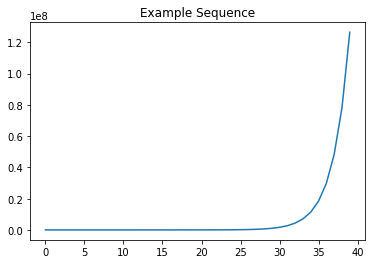

In [6]:
count = 0
solutions['t-s'] = 0
for i in trange(len(data['Sequence'])):
    seq = data['Sequence'][i]
    if checkTripletSum(seq):
        count += 1
        solutions.loc[i, 'Solved'] = 1
        solutions.loc[i, 't-s'] = 1
        if count == 1:
            plt.plot(seq)
            plt.title('Example Sequence')

print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

## Product Triplets


Solved: 372 (0.17%)


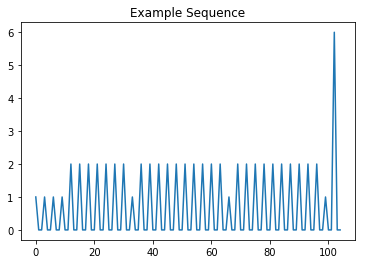

In [7]:
count = 0
solutions['t-p'] = 0
for i in trange(len(data['Sequence'])):
    seq = data['Sequence'][i]
    if checkTripletProd(seq):
        count += 1
        solutions.loc[i, 'Solved'] = 1
        solutions.loc[i, 't-p'] = 1
        if count == 1:
            plt.plot(seq)
            plt.title('Example Sequence')

print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

## Difference Triplets


Solved: 111 (0.05%)


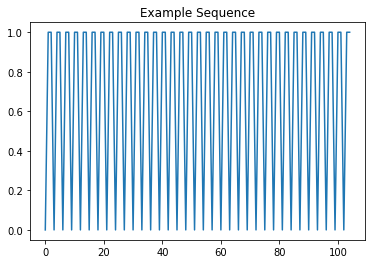

In [8]:
count = 0
solutions['t-d'] = 0
for i in trange(len(data['Sequence'])):
    seq = data['Sequence'][i]
    if checkTripletDiff(seq):
        count += 1
        solutions.loc[i, 'Solved'] = 1
        solutions.loc[i, 't-d'] = 1
        if count == 1:
            plt.plot(seq)
            plt.title('Example Sequence')

print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

## Pythagorean Triplets


Solved: 79 (0.04%)


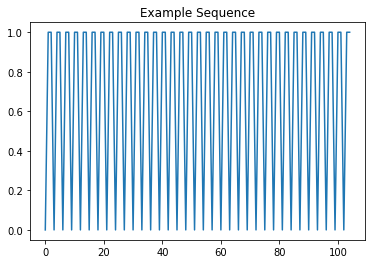

In [9]:
count = 0
solutions['t-py'] = 0
for i in trange(len(data['Sequence'])):
    seq = data['Sequence'][i]
    if checkTripletPyth(seq):
        count += 1
        solutions.loc[i, 'Solved'] = 1
        solutions.loc[i, 't-py'] = 1
        if count == 1:
            plt.plot(seq)
            plt.title('Example Sequence')

print(f'Solved: {count} ({round((count*100)/len(data),2)}%)')

# Final Standings

In [10]:
solutions.drop(['Id'], axis=1).mean(0).mul(100).round(2).astype(str) + '%'

Solved    28.97%
r10        7.89%
r9         9.34%
r8        10.28%
r7        10.05%
r6         9.06%
r5         8.13%
r4         7.62%
r3         6.68%
r2         4.18%
r1         0.74%
p10        2.08%
p9         2.13%
p8         2.13%
p7         2.09%
p6         2.05%
p5         1.86%
p4          1.7%
p3         1.44%
p2         1.12%
p1         0.56%
t-s        0.23%
t-p        0.17%
t-d        0.05%
t-py       0.04%
dtype: object

In [12]:
print('linear recurrence relations', round(solutions[[f'r{i}' for i in range(1, 11)]].max(axis=1).mean() * 100, 2), '%')
print('polynomial sequences', round(solutions[[f'p{i}' for i in range(1, 11)]].max(axis=1).mean() * 100, 2), '%')
print('triplets', round(solutions[['t-s', 't-p', 't-d', 't-py']].max(axis=1).mean() * 100, 2), '%')

linear recurrence relations 28.64 %
polynomial sequences 2.58 %
triplets 0.4 %


In [13]:
solutions.to_csv('Solutions.csv', index=False)